In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# EDA

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

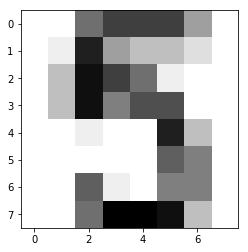

In [20]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [21]:
# Create feature and target arrays
X = digits.data
y = digits.target

Train/test split by  `train_test_split`:
* By default, `train_test_split` splits the data into 75% training data and 25% test data which is a good rule of thumb.
* `stratify=y` makes sure that the labels to be distributed in train and test sets as they are in the original dataset.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Train Model

The scikit-learn API requies that:
* The data is represented by NumPy array or pandas DataFrame with features in columns and observations in rows.
* The features take on continuous values as opposed to the categories.
* No missing values

In [23]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

# Measure model performance

## Compute accuracy  on the test data

In [24]:
# Predict the labels for the test data
y_pred = knn.predict(X_test)
print("Test set prediction:\n {}".format(y_pred))

Test set prediction:
 [1 0 1 5 4 1 4 9 2 9 2 0 8 7 6 0 6 1 6 8 1 2 0 7 3 2 9 7 2 0 2 1 4 2 6 0 7
 3 4 9 8 6 5 5 6 8 7 5 7 9 3 4 5 0 8 8 8 0 9 9 8 9 5 1 4 6 9 1 4 1 1 6 4 5
 6 3 5 6 9 3 5 7 6 9 3 3 9 5 0 3 3 7 7 7 5 5 9 4 9 5 1 4 2 7 1 7 7 5 2 2 1
 0 1 6 0 3 1 0 8 9 5 4 1 6 6 2 6 0 4 5 0 6 9 2 0 0 9 0 2 1 3 7 3 8 2 4 1 8
 9 1 6 8 2 1 7 1 7 9 7 7 7 7 3 7 4 2 0 2 4 8 6 0 8 4 5 9 6 3 6 0 8 9 7 5 0
 0 4 4 0 5 1 7 3 8 1 0 5 0 4 5 8 3 5 4 1 7 9 5 7 9 9 0 2 6 2 3 2 1 8 7 6 7
 3 0 6 7 9 3 4 8 7 1 2 5 9 9 3 5 7 3 3 4 9 1 4 3 6 6 1 1 3 6 9 2 2 4 8 5 5
 3 8 1 4 5 6 6 0 3 0 3 5 1 7 8 9 4 5 7 0 1 4 8 0 9 9 2 3 2 4 3 4 4 1 7 4 5
 0 4 1 3 4 5 4 4 5 1 3 2 7 2 5 7 6 4 4 7 8 7 5 2 0 3 3 4 4 2 8 9 8 7 4 4 1
 7 9 2 0 3 1 4 5 8 5 6 5 3 9 1 0 0 1 3 6 0 2 5 5 0 6 7 5 3 6 9 1 7 8 0 3 9
 6 7 6 1 8 6 4 8 4 3 7 6 7 5 8 0 4 3 2 2 8 5 7 8 1 0 3 2 1 1 3 3 4 6 0 3 8
 1 6 6 6 8 8 7 5 2 2 6 8 6 9 4 5 7 4 0 2 3 3 5 6 8 2 1 8 1 0 7 2 1 5 8 9 0
 4 3 3 8 1 1 3 9 5 5 9 6 9 2 9 6 0 8 2 1 7 8 0 2 7 9 6 6 0 7 0 1 2 9 0 6 3
 6 

In [25]:
# check the accuracy of our model
knn.score(X_test, y_test)

0.975925925925926

## Plot model complexity curves
Model complexity:  
Larger k = smoother decision boundary = less complex model  
Overfitting: complex models run the risk of being sensitive to noise in the specific data rather than reflecting the genral trend in the data  
Underfitting  
Sweet spot

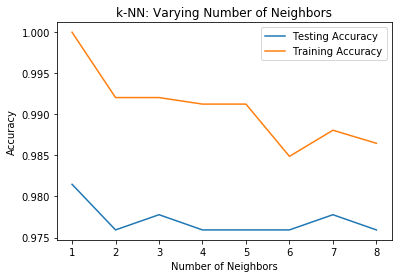

In [28]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()